In [1]:
import scanpy as sc
import numpy as np
import os, sys

os.makedirs('../data', exist_ok=True)
os.makedirs('../data/proc', exist_ok=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Download datasets

## PBMC 3k

In [ ]:
os.makedirs('../data/pbmc3k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc3k/; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz; rm pbmc3k_filtered_gene_bc_matrices.tar.gz


In [ ]:
data_path = '../data/pbmc3k/filtered_gene_bc_matrices/hg19'
results_file = '../data/proc/pbmc3k.h5ad'
results_file2 = '../data/proc/pbmc3k.tfrecord'

In [ ]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 40
resolution = 1.0

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
#Louvain    Markers       Cell Type
#0          IL7R, CD4     T cells
#1          CD14, LYZ     CD14+ Monocytes
#2          MS4A1         B cells
#3          CD8A, CD8     T cells
#4          GNLY, NKG7    NK cells
#5          FCGR3A, MS4A7 FCGR3A+ Monocytes
#6          FCER1A, CST3  Dendritic Cells
#7          PPBP          Megakaryocytes

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14+ Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A+ Monocytes',
    'Dendritic', 'Megakaryocytes']

## PBMC 8k

In [ ]:
os.makedirs('../data/pbmc8k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc8k/; tar -xzf pbmc8k_filtered_gene_bc_matrices.tar.gz; rm pbmc8k_filtered_gene_bc_matrices.tar.gz


In [ ]:
data_path = '../data/pbmc8k/filtered_gene_bc_matrices/GRCh38/'
results_file = '../data/proc/pbmc8k.h5ad'
results_file2 = '../data/proc/pbmc8k.tfrecord'

In [ ]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 20
resolution = 0.7

In [ ]:
marker_genes = ['IL7R','CD4' ,'CD8A', 'CD8B', 
                'LYZ', 'CD14',
                'MS4A1', 
                'CD79A',
                'LGALS3', 'S100A8', 
                'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 
                'FCER1A', 'CST3', 
               ]

In [ ]:
new_cluster_names = [
    'CD4+_T-Cells',
    'CD14+_Monocytes',
        'CD8+_T-Cells',
        'CD4+_T-Cells ',
    'B_cells',
    'NK',
    'B_cells ',
    'CD4+_T-Cells  ',
    'NK ',
    'NK  ',
    'FCGR3A+_Monocytes',
    'Dendritic_cells',
    'Megakaryocytes']

## PBMC 10k

In [3]:
os.makedirs('../data/pbmc10k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz  -O ../data/pbmc10k/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
!cd ../data/pbmc10k/; tar -xzf pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz; rm pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz


--2019-09-24 06:35:37--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 143.204.247.106, 143.204.247.13, 143.204.247.31, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|143.204.247.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94334700 (90M) [application/x-tar]
Saving to: ‘../data/pbmc10k/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz’

100%[======================================>] 94,334,700  25.7MB/s   in 4.3s   

2019-09-24 06:35:42 (20.7 MB/s) - ‘../data/pbmc10k/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz’ saved [94334700/94334700]



In [4]:
data_path = '../data/pbmc10k/filtered_feature_bc_matrix'
results_file = '../data/proc/pbmc10k.h5ad'
results_file2 = '../data/proc/pbmc10k.tfrecord'

In [5]:
gene_up = 4500
percent_mito_up = 0.3
n_pcs = 40
resolution = 0.6

In [6]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'TRAC', 'CD8A', 'CD8B','CD4', 'LYZ', 'CD14',
                'LGALS3', 'S100A8','CD14', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7','IL6R', 'FCER1A', 'CST3', 'PPBP', 'IL3RA', 'CD40']

In [7]:
new_cluster_names = [
    'CD14+ Monocytes', 
    'Double negative T cells',
    'CD14+ Monocytes__', 
    'Double negative T cells__',
    'Mature B cell',
    'CD8 Effector', 
    'NK cells','Plasma cell','CD8 Effector__','FCGR3A+ Monocytes','CD8 Naive','Megakaryocytes','Immature B cell','CD14+ Monocytes______','Dendritic cells',
    'CD8 Effector____','pDC','Dendritic cells__']

# Data preprocessing

In [8]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.0 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [9]:
adata = sc.read_10x_mtx(
            data_path,  # the directory with the `.mtx` file
            var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
            cache=True)                                # write a cache file for faster subsequent reading

... writing an h5ad cache file to speedup reading next time


In [10]:
sc.settings.set_figure_params(dpi=80)

In [11]:
adata.var_names_make_unique()  # this is unnecessary if using 'gene_ids'

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


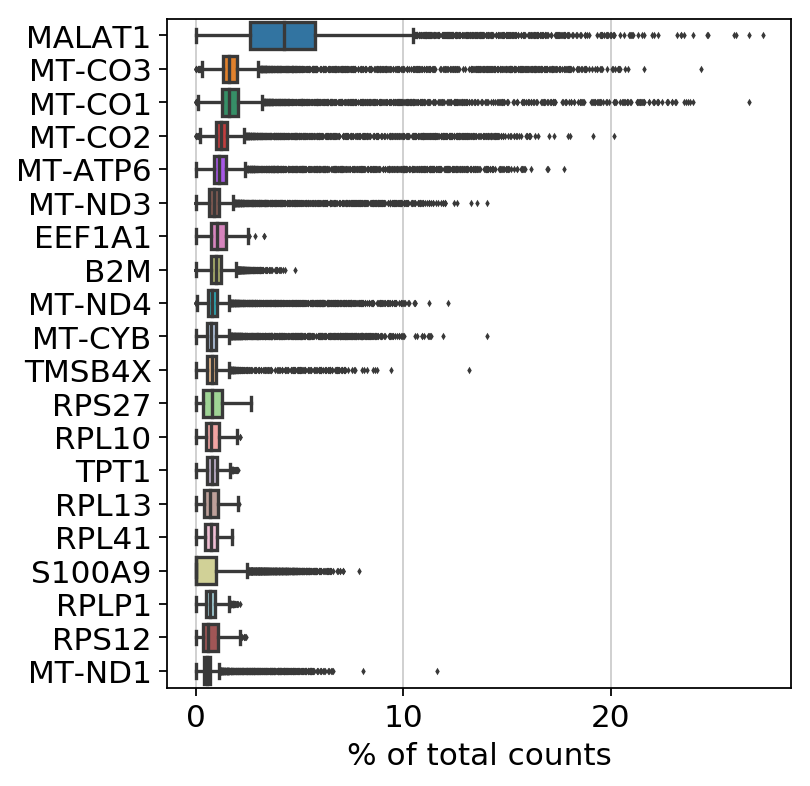

filtered out 232 cells that haveless than 200 genes expressed


Trying to set attribute `.obs` of view, making a copy.


filtered out 13246 genes that are detectedin less than 3 cells


In [12]:
# Show those genes that yield the highest fraction of counts in each single cells, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20)


# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [13]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'feature_types' as categorical


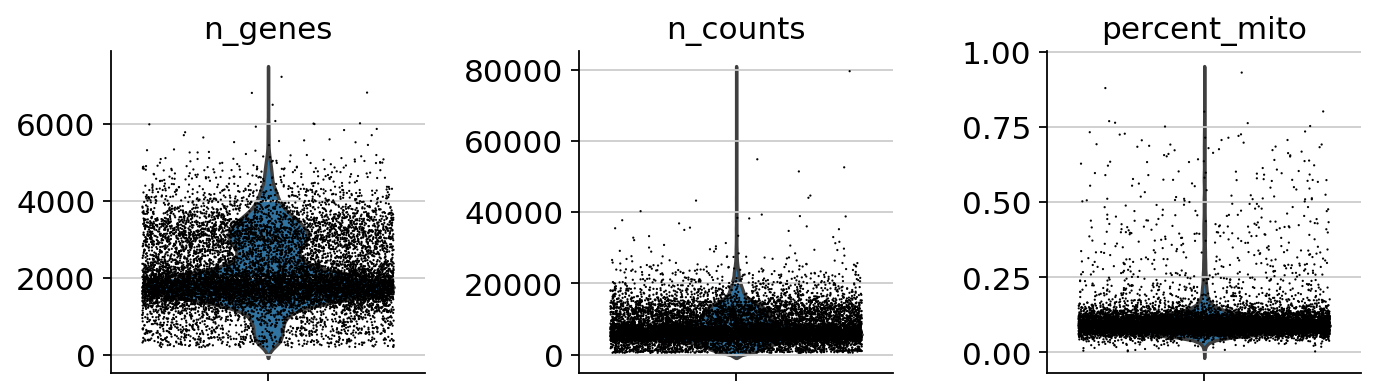

In [14]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

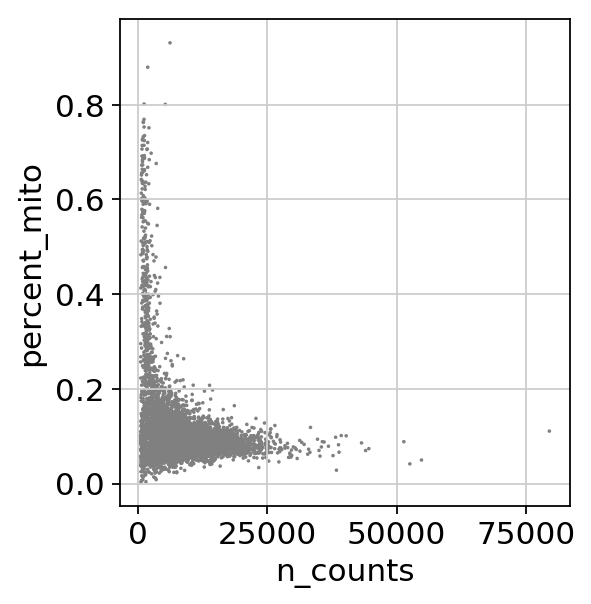

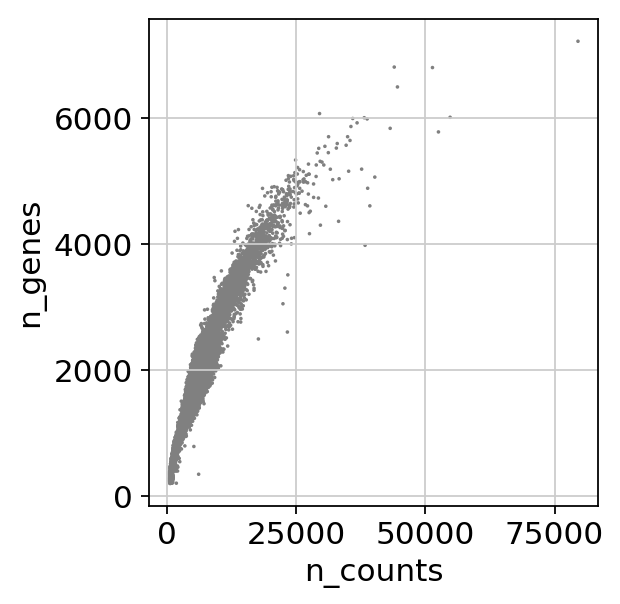

In [15]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [16]:
adata = adata[adata.obs['n_genes'] < gene_up, :] 
adata = adata[adata.obs['percent_mito'] < percent_mito_up, :]

In [17]:
# Data in log scale
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

adata.raw = adata

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


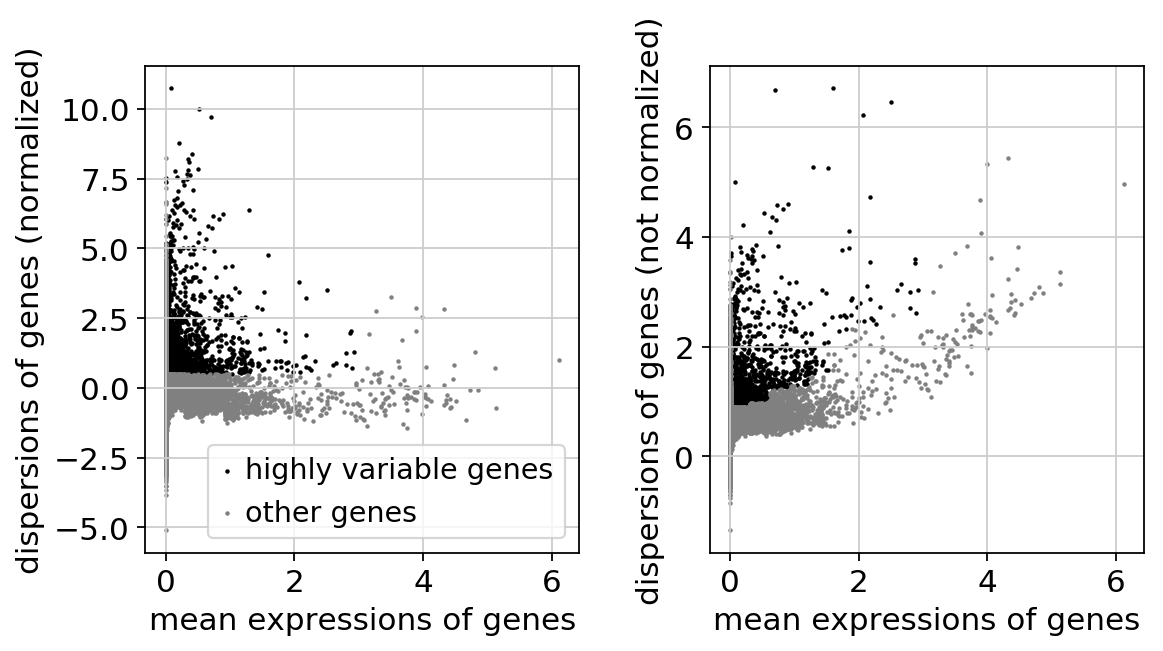

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [19]:
adata = adata[:, adata.var['highly_variable']]

In [20]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:30)


In [21]:
sc.pp.scale(adata, max_value=10)

In [22]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:02)


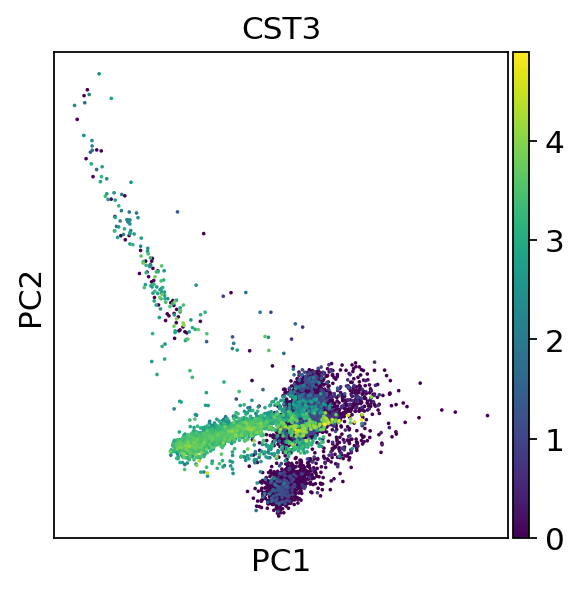

In [23]:
sc.pl.pca(adata, color='CST3')

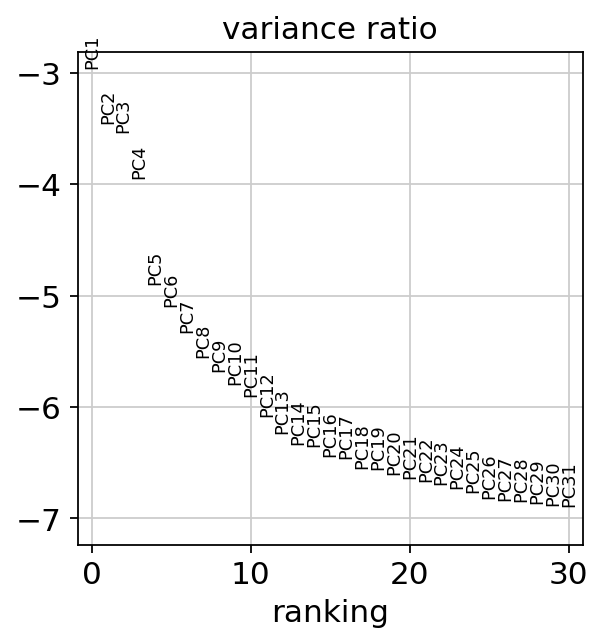

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:06)


In [26]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


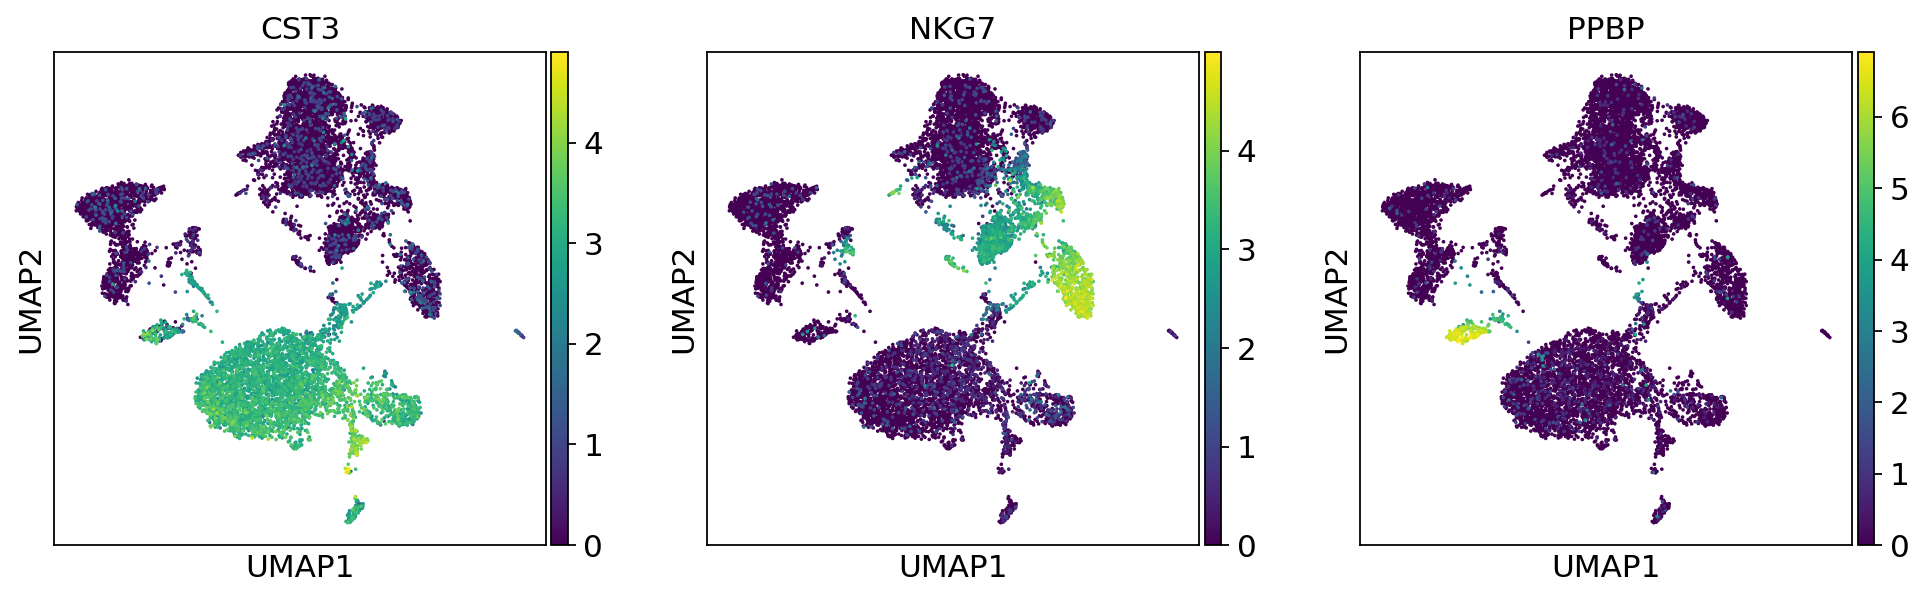

In [27]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

In [28]:
sc.tl.louvain(adata, resolution=resolution)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


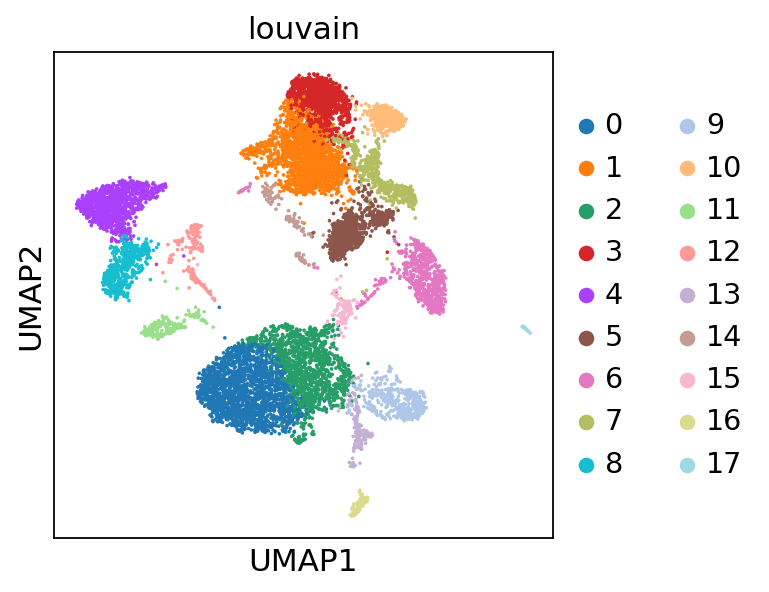

In [30]:
# sc.pl.umap(adata, color=['louvain', 'CST3', 'NKG7'])
sc.pl.umap(adata, color=['louvain'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


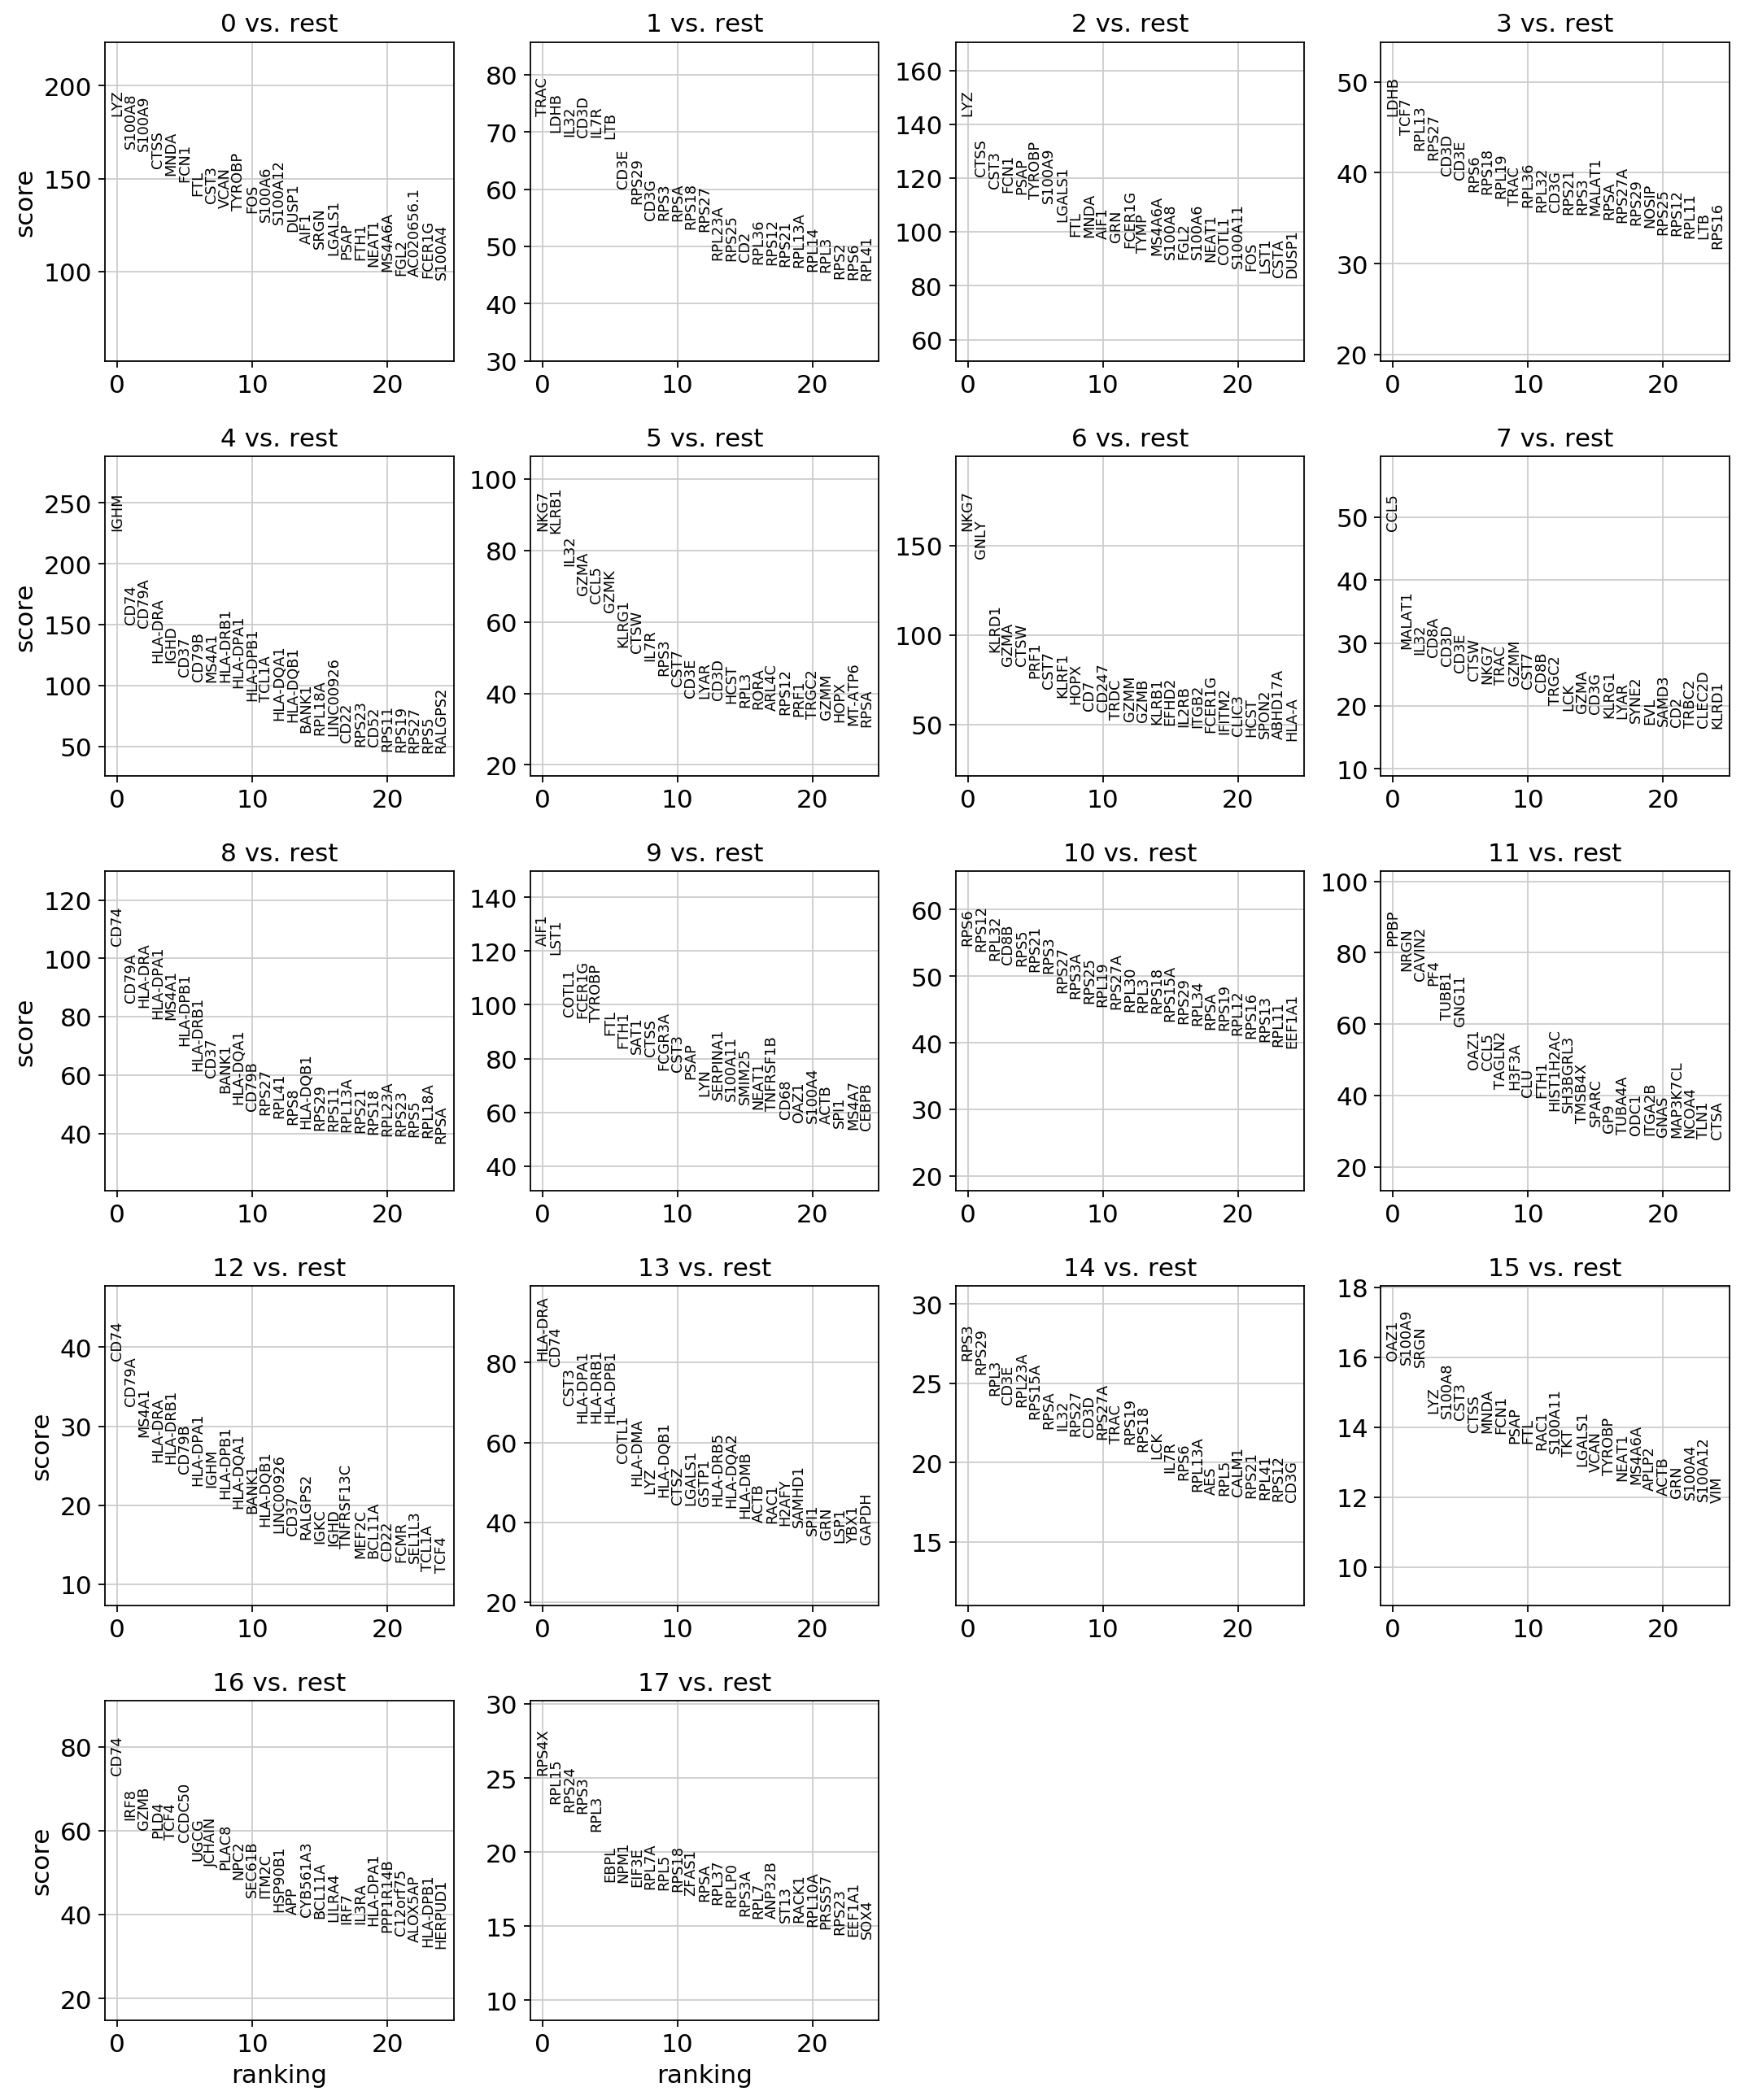

In [31]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [32]:
adata.var_names[adata.var_names.str.startswith('IG')]

Index(['IGKC', 'IGFBP2', 'IGFBP7', 'IGIP', 'IGF2BP3', 'IGFBP3', 'IGHMBP2',
       'IGHA2', 'IGHG4', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHD', 'IGHM',
       'IGF1R', 'IGSF6', 'IGFBP4', 'IGLL5', 'IGLC2', 'IGLC3', 'IGLC5', 'IGLC6',
       'IGLC7'],
      dtype='object')

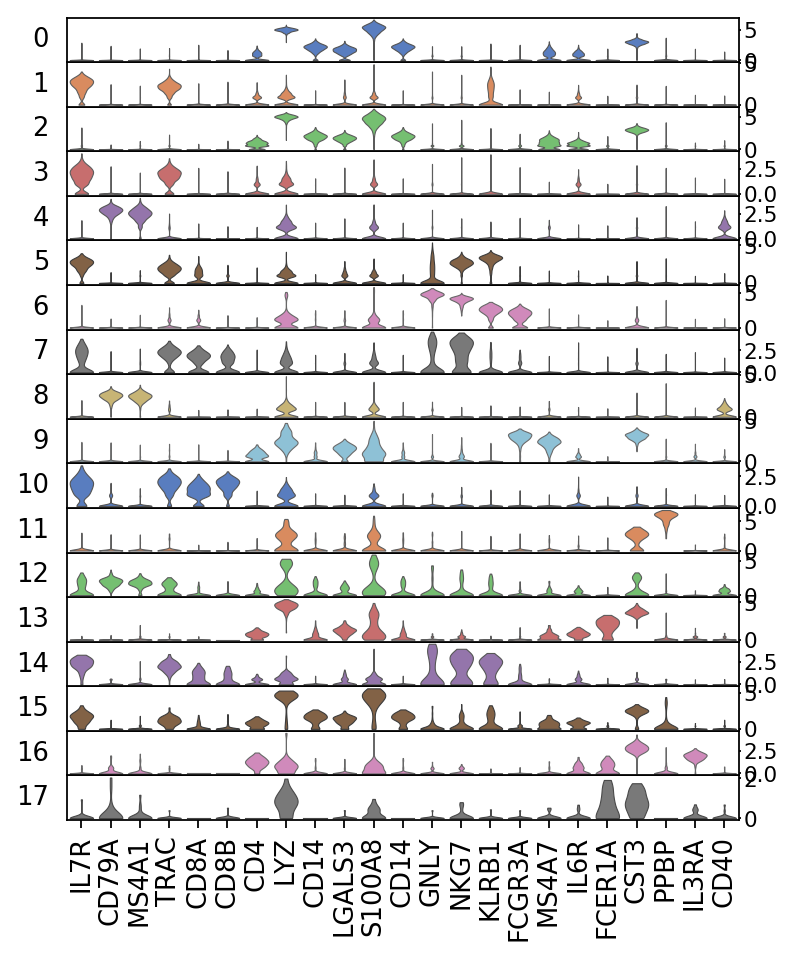

In [34]:
sc.pl.stacked_violin(adata, groupby='louvain', var_names=marker_genes);

In [ ]:
try:
    sc.pl.stacked_violin(adata, groupby='louvain', var_names=marker_genes)
except:
    print("marker genes not defined for this dataset")

In [ ]:
try:
    adata.rename_categories('louvain', new_cluster_names)
except:
    print("new cluster names not defined for this dataset")

In [35]:
adata.obs.louvain = [ i.split('_')[0] for i in adata.obs.louvain]

del adata.uns['louvain_colors']

... storing 'louvain' as categorical


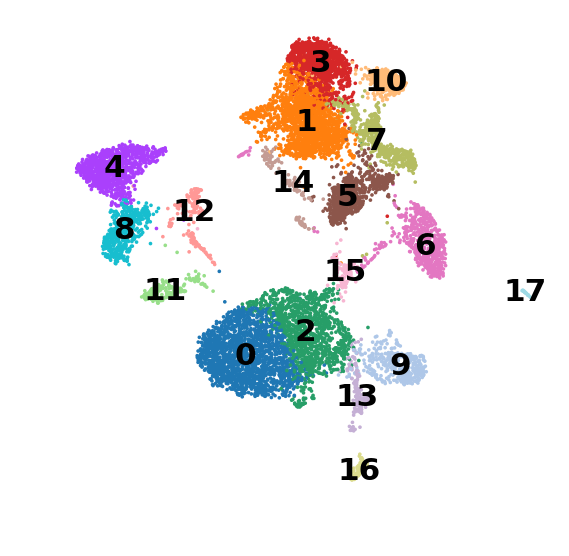

In [36]:
sc.pl.umap(adata, color='louvain', legend_loc='on data', title='', frameon=False)

In [37]:
adata.write_h5ad(results_file, compression='gzip')

In [38]:
# export file in TFRecords format

sys.path.append('../src')
from utils import export_to_tfrecord

export_to_tfrecord(results_file2, adata)


  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  



In [39]:
adata

AnnData object with n_obs × n_vars = 11090 × 2145 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'rank_genes_groups', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'